# Stock market price prediction using twitter Sentiment Analysis

### Note: Please don't uncomment 

### importing all the required libraries

In [1]:
import numpy as np
import pandas as pd
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
import matplotlib.pyplot as mlpt
import tweepy
import csv
import random
# import warning
# warning.filterwarnings('ignore')

### Keys for Twitter API

In [2]:
# All Keys 
consumer_key = "Npwlgs3JiPp4bTAFbVblPjTJu"
consumer_secret = "nY7OdO460jDbshS35xb0L47ydWdBwimL8N8j7P6NygicIyS2hx"
access_token = "706057362898067456-4uBYLSUjo1ZfOEriSTRsMjqE5BIpV1w"
access_token_secret = "aTjCcGMarS7vAr9bPklXNHnBFlsN34IxCIDq7QgtL8lRv"
API_KEY = '3zn31CxIHmKnceosjdJxMIEz4'
API_SECRET_KEY = '5VELegb6NciLmAyFaM5hAnQ8jcmKxUfBUrjBOECS24nLJOg3cS'
# access_token_secret = os.environ["ACCESS_TOKEN_SECRET"]

### Authentication 

In [3]:
# auth = tweepy.OAuthHandler(
#     consumer_key,
#     consumer_secret,
#     access_token,
#     access_token_secret
# )
# api = tweepy.API(auth,wait_on_rate_limit=True)


auth  = tweepy.OAuthHandler(API_KEY,API_SECRET_KEY)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth)

### Fetching tweets for HDFC Bank Limited

In [4]:
# fetch_tweets=tweepy.Cursor(api.search_tweets, q="#hdfc", count=100, lang ="en", until="2023-05-27", tweet_mode="extended").items()

### Creating Data Frame of HDFC tweets data

In [5]:
# # Created data frame using pandas
# data=pd.DataFrame(data=[[tweet_info.created_at.date(),tweet_info.full_text]for tweet_info in fetch_tweets],columns=['Date','Tweets'])
# # Show data
# data


In [6]:
# data["Tweets"].head()

## Reading Stored Tweets

In [7]:
tweets = pd.read_csv('./Tweets.csv')

# adding header
headerList = ['No','Date', 'Tweets']
  
# converting data frame to csv
tweets.to_csv("StoredTweets.csv", header=headerList, index=False)

data = pd.read_csv("StoredTweets.csv")
data

,No,Date,Tweets
0,1,10-12-2022,#HDFC $HDFC Monthwise Daily High - Low Movemen...
1,2,10-12-2022,#NIFTY #NIFTY50 #India50 #Banknifty #Finnifty\...
2,3,10-12-2022,Premium Real Estate Facebook &amp; Linkedin Gr...
3,4,10-12-2022,#HDFC $HDFC Daily #Stock Chart with 100 days #...
4,5,10-12-2022,#hdfc weekly https://t.co/BeW9U1nsXf
...,...,...,...
5647,668,2023-02-14,"#HDFC 🇮🇳 on the #NSE #Block of 22,483 shares a..."
5648,669,2023-02-14,HDFC Bank: launched a pilot project known as '...
5649,670,2023-02-14,RT @m2pfintech: HDFC Bank begins offline payme...
5650,671,2023-02-14,HDFC Bank begins offline payment pilot under R...


### Removing special character from each tweets

In [8]:
# Creating a csv file of tweet data
# data.to_csv('Tweets.csv')

# Append Pandas DataFrame to Existing CSV File
# append data frame to CSV file
# data.to_csv('Tweets.csv', mode='a', header=False)

# Creating cData frame
clean_data = pd.DataFrame(columns=['Date','Tweets'])
index = 0
total = 100
for index,row in data.iterrows():
    tweet_re = row["Tweets"]
    # Remove special character using re 
    my_new_tweet = re.sub('[^a-zA-Z0-9]',' ',tweet_re)
    temp_df = pd.DataFrame([[data['Date'].iloc[index],my_new_tweet]], columns = ["Date", 'Tweets'])
    clean_data = pd.concat([clean_data, temp_df], axis=0).reset_index(drop=True)

# Show clean_data
clean_data

,Date,Tweets
0,10-12-2022,HDFC HDFC Monthwise Daily High Low Movemen...
1,10-12-2022,NIFTY NIFTY50 India50 Banknifty Finnifty ...
2,10-12-2022,Premium Real Estate Facebook amp Linkedin Gr...
3,10-12-2022,HDFC HDFC Daily Stock Chart with 100 days ...
4,10-12-2022,hdfc weekly https t co BeW9U1nsXf
...,...,...
5647,2023-02-14,HDFC on the NSE Block of 22 483 shares a...
5648,2023-02-14,HDFC Bank launched a pilot project known as ...
5649,2023-02-14,RT m2pfintech HDFC Bank begins offline payme...
5650,2023-02-14,HDFC Bank begins offline payment pilot under R...


#### Creating a dataframe where we will combine the tweets date wise and store into combine_clean_data

In [9]:
combine_clean_data = pd.DataFrame(columns=['Date','Tweets'])

In [10]:
indx=0
get_tweet=""
for i in range(0,len(clean_data)-1):
    get_date = clean_data.Date.iloc[i]
    next_date = clean_data.Date.iloc[i+1]
    
    if(str(get_date) == str(next_date)):
        get_tweet=get_tweet + clean_data.Tweets.iloc[i] + " "
        
    if(str(get_date)!=str(next_date)):
        temp_df = pd.DataFrame([[get_date, 
                                get_tweet]], columns = ['Date','Tweets'])
        combine_clean_data = pd.concat([combine_clean_data, temp_df], axis = 0).reset_index(drop = True)
        get_tweet=" "

#### All the tweets has been clubbed as per their date.


In [11]:
# Show Datafame 
combine_clean_data

,Date,Tweets
0,10-12-2022,HDFC HDFC Monthwise Daily High Low Movemen...
1,09-12-2022,OptionChain HDFC Stock Bearish PCR 0 ...
2,08-12-2022,From 10th January 2023 to 7th June 2023 pleas...
3,07-12-2022,HDFC HDFC chart suggests Fibonacci based ...
4,06-12-2022,RedmiA1 at Rs 5669 only Offer using HDF...
...,...,...
68,2023-02-19,Dear HDFCBank Cares I have your cc which h...
69,2023-02-18,HDFC HDFC Monthwise Daily High Low Moveme...
70,2023-02-17,OptionChain HDFC Stock Bearish PCR 0 ...
71,2023-02-16,OptionChain HDFC Stock Bearish PCR 0 ...


#### Now to know the "closing price" of each day we will import STOCK PRICE DATA for HDFC Bank from "yahoo.finance". We will consider "Close" price only.


In [12]:
# Read hdfc stock data from HDB.csv
read_stock_price=pd.read_csv('HDFCBANK.csv')

read_stock_price["Date"] = pd.to_datetime(read_stock_price["Date"]).dt.strftime('%d-%m-%Y')

# print Stock Data 
read_stock_price

,Date,Open,High,Low,Close,Adj Close,Volume
0,15-02-2022,1476.000000,1524.900024,1473.050049,1517.800049,1500.355347,6567533
1,16-02-2022,1534.349976,1534.750000,1507.000000,1515.750000,1498.328857,5016132
2,17-02-2022,1513.099976,1522.000000,1502.000000,1506.500000,1489.185181,3675604
3,18-02-2022,1498.300049,1517.000000,1490.449951,1512.349976,1494.967896,3898064
4,21-02-2022,1504.000000,1530.699951,1495.550049,1522.099976,1504.605835,3734033
...,...,...,...,...,...,...,...
245,09-02-2023,1660.000000,1661.650024,1635.550049,1650.550049,1650.550049,5888668
246,10-02-2023,1648.800049,1658.500000,1642.199951,1657.099976,1657.099976,4086058
247,13-02-2023,1655.000000,1661.750000,1644.550049,1658.349976,1658.349976,2868472
248,14-02-2023,1665.000000,1677.500000,1657.949951,1673.699951,1673.699951,5454296


#### Adding a "Price" column in our dataframe and fetching the stock price as per the date in our dataframe.


In [13]:
# Add Prices column to the combine_clean_data dataframe 
combine_clean_data['Prices']=""

In [14]:
indx=0
for i in range (0,len(combine_clean_data)):
    for j in range (0,len(read_stock_price)):
        get_tweet_date = combine_clean_data.Date.iloc[i]
        get_stock_date = read_stock_price.Date.iloc[j]
        if(str(get_stock_date) == str(get_tweet_date)):
            combine_clean_data['Prices'].iloc[i] = int(read_stock_price.Close[j])

In [15]:
# Print dataframe 
combine_clean_data

,Date,Tweets,Prices
0,10-12-2022,HDFC HDFC Monthwise Daily High Low Movemen...,
1,09-12-2022,OptionChain HDFC Stock Bearish PCR 0 ...,1631
2,08-12-2022,From 10th January 2023 to 7th June 2023 pleas...,1619
3,07-12-2022,HDFC HDFC chart suggests Fibonacci based ...,1610
4,06-12-2022,RedmiA1 at Rs 5669 only Offer using HDF...,1611
...,...,...,...
68,2023-02-19,Dear HDFCBank Cares I have your cc which h...,
69,2023-02-18,HDFC HDFC Monthwise Daily High Low Moveme...,
70,2023-02-17,OptionChain HDFC Stock Bearish PCR 0 ...,
71,2023-02-16,OptionChain HDFC Stock Bearish PCR 0 ...,


#### So we take the mean for the close price and put it in the blank value

In [16]:
mean=0
summ=0
count=0

for i in range(0,len(combine_clean_data)):
    if(combine_clean_data.Prices.iloc[i]!=""):
        summ=summ+int(combine_clean_data.Prices.iloc[i])
        count=count+1
        
mean=summ/count

for i in range(0,len(combine_clean_data)):
    if(combine_clean_data.Prices.iloc[i]==""):
        combine_clean_data.Prices.iloc[i]=int(mean)

#### Now all the entries have some value

In [17]:
# Print dataframe
combine_clean_data

,Date,Tweets,Prices
0,10-12-2022,HDFC HDFC Monthwise Daily High Low Movemen...,1627
1,09-12-2022,OptionChain HDFC Stock Bearish PCR 0 ...,1631
2,08-12-2022,From 10th January 2023 to 7th June 2023 pleas...,1619
3,07-12-2022,HDFC HDFC chart suggests Fibonacci based ...,1610
4,06-12-2022,RedmiA1 at Rs 5669 only Offer using HDF...,1611
...,...,...,...
68,2023-02-19,Dear HDFCBank Cares I have your cc which h...,1627
69,2023-02-18,HDFC HDFC Monthwise Daily High Low Moveme...,1627
70,2023-02-17,OptionChain HDFC Stock Bearish PCR 0 ...,1627
71,2023-02-16,OptionChain HDFC Stock Bearish PCR 0 ...,1627


#### Making "prices" column as integer so mathematical operations could be performed easily.

In [18]:
combine_clean_data['Prices'] = combine_clean_data['Prices'].apply(np.int64)

#### Adding 4 new columns in our dataframe so that sentiment analysis could be performed.. Comp is "Compound" it will tell whether the statement is overall negative or positive. If it has negative value then it is negative, if it has positive value then it is positive. If it has value 0, then it is neutral.

In [19]:
# Add 4 new columns in combine_clean_data dataframe
combine_clean_data["Comp"] = ''
combine_clean_data["Negative"] = ''
combine_clean_data["Neutral"] = ''
combine_clean_data["Positive"] = ''

# print ccdata dataframe 
combine_clean_data

,Date,Tweets,Prices,Comp,Negative,Neutral,Positive
0,10-12-2022,HDFC HDFC Monthwise Daily High Low Movemen...,1627,,,,
1,09-12-2022,OptionChain HDFC Stock Bearish PCR 0 ...,1631,,,,
2,08-12-2022,From 10th January 2023 to 7th June 2023 pleas...,1619,,,,
3,07-12-2022,HDFC HDFC chart suggests Fibonacci based ...,1610,,,,
4,06-12-2022,RedmiA1 at Rs 5669 only Offer using HDF...,1611,,,,
...,...,...,...,...,...,...,...
68,2023-02-19,Dear HDFCBank Cares I have your cc which h...,1627,,,,
69,2023-02-18,HDFC HDFC Monthwise Daily High Low Moveme...,1627,,,,
70,2023-02-17,OptionChain HDFC Stock Bearish PCR 0 ...,1627,,,,
71,2023-02-16,OptionChain HDFC Stock Bearish PCR 0 ...,1627,,,,


#### Downloading this package was essential to perform sentiment analysis.

In [20]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

#### This part of the code is responsible for assigning the polarity for each statement. That is how much positive, negative, neutral you statement is. And also assign the compound value that is overall sentiment of the statement.

In [21]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
sentiment_i_a = SentimentIntensityAnalyzer()
for indexx, row in combine_clean_data.T.iteritems():
        sentence_i = unicodedata.normalize('NFKD', combine_clean_data.loc[indexx, 'Tweets'])
        sentence_sentiment = sentiment_i_a.polarity_scores(sentence_i)
        combine_clean_data['Comp'].iloc[indexx] = sentence_sentiment['compound']
        combine_clean_data['Negative'].iloc[indexx] = sentence_sentiment['neg']
        combine_clean_data['Neutral'].iloc[indexx] = sentence_sentiment['neu']
        combine_clean_data['Positive'].iloc[indexx] = sentence_sentiment['compound']

        

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11760\1020392755.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combine_clean_data['Comp'].iloc[indexx] = sentence_sentiment['compound']
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11760\1020392755.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combine_clean_data['Negative'].iloc[indexx] = sentence_sentiment['neg']
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11760\1020392755.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

In [22]:
combine_clean_data

,Date,Tweets,Prices,Comp,Negative,Neutral,Positive
0,10-12-2022,HDFC HDFC Monthwise Daily High Low Movemen...,1627,0.9701,0.046,0.87,0.9701
1,09-12-2022,OptionChain HDFC Stock Bearish PCR 0 ...,1631,0.9967,0.058,0.842,0.9967
2,08-12-2022,From 10th January 2023 to 7th June 2023 pleas...,1619,0.9981,0.061,0.832,0.9981
3,07-12-2022,HDFC HDFC chart suggests Fibonacci based ...,1610,0.9987,0.064,0.834,0.9987
4,06-12-2022,RedmiA1 at Rs 5669 only Offer using HDF...,1611,0.9994,0.062,0.822,0.9994
...,...,...,...,...,...,...,...
68,2023-02-19,Dear HDFCBank Cares I have your cc which h...,1627,0.9985,0.056,0.841,0.9985
69,2023-02-18,HDFC HDFC Monthwise Daily High Low Moveme...,1627,0.9991,0.025,0.894,0.9991
70,2023-02-17,OptionChain HDFC Stock Bearish PCR 0 ...,1627,0.9994,0.054,0.847,0.9994
71,2023-02-16,OptionChain HDFC Stock Bearish PCR 0 ...,1627,0.9996,0.055,0.833,0.9996


#### Calculating the percentage of postive and negative tweets, and plotting the PIE chart for the same

% of positive tweets=  95.8904109589041
% of negative tweets=  4.10958904109589
% of neutral tweets =  0.0


[]

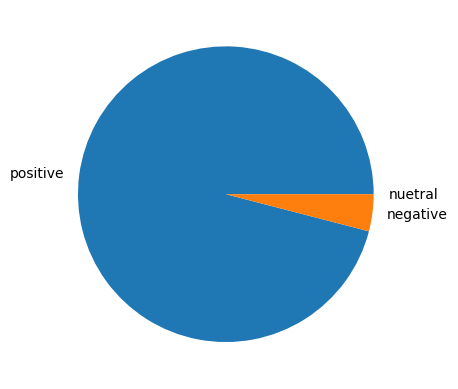

In [23]:
posi=0
nega=0
neu=0
for i in range (0,len(combine_clean_data)):
    get_val=combine_clean_data.Comp[i]
    if(float(get_val)<(0)):
        nega=nega+1
    if(float(get_val>(0))):
        posi=posi+1
    if(float(get_val) == 0):
        neu = neu + 1
    
posper=(posi/(len(combine_clean_data)))*100
negper=(nega/(len(combine_clean_data)))*100
neuper = (neu/(len(combine_clean_data)))*100

print("% of positive tweets= ",posper)
print("% of negative tweets= ",negper)
print("% of neutral tweets = ",neuper)

arr=np.asarray([posper,negper, neuper], dtype=int)
mlpt.pie(arr,labels=['positive','negative', 'nuetral'])
mlpt.plot()

#### Making a new dataframe with necessary columns for providing machine learning.


In [24]:
dataframe = combine_clean_data[['Date','Prices','Comp','Negative','Neutral','Positive']].copy()

# Appying Machine Learning Algorithms

## Random Forest Regression 

### Diving the dataset 

In [25]:
# train_start_date = '01-12-2022'
# train_end_date = '19-01-2023'
# test_start_date = '20-01-2023'
# test_end_date = '09-02-2023'
# train = dataframe.loc[train_start_date : train_end_date,:]
# test = dataframe.loc[test_start_date:test_end_date,:]

train_start_date = '0'
train_end_date = '44'
test_start_date = '45'
test_end_date = '65'
train = dataframe.loc[train_start_date : train_end_date,:]
test = dataframe.loc[test_start_date:test_end_date,:]

In [26]:
sentiment_score_list = []
for date, row in train.T.iteritems():
    sentiment_score = np.asarray([dataframe.loc[date, 'Negative'],dataframe.loc[date, 'Positive']])
    sentiment_score_list.append(sentiment_score)
numpy_df_train = np.asarray(sentiment_score_list)

In [27]:
sentiment_score_list = []
for date, row in test.T.iteritems():
    sentiment_score = np.asarray([dataframe.loc[date, 'Negative'],dataframe.loc[date, 'Positive']])
    sentiment_score_list.append(sentiment_score)
numpy_df_test = np.asarray(sentiment_score_list)

### Making 2 dataframe for Training and Testing "Prices". You can also make 1-D array for the same.

In [28]:
y_train = pd.DataFrame(train['Prices'])
y_test = pd.DataFrame(test['Prices'])

### Fitting the sentiments(this acts as in independent value) and prices(this acts as a dependent value (like class-lables in iris dataset))

In [29]:
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score

0.8187461643502063


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11760\1343769374.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Prices']=test['Prices'].apply(np.int64)


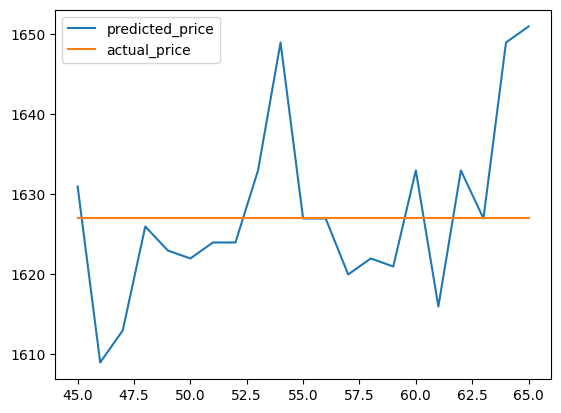

In [31]:
# from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix


rf = RandomForestRegressor()
rf.fit(numpy_df_train, train['Prices'])
prediction=rf.predict(numpy_df_test)

import matplotlib.pyplot as plt
%matplotlib inline
# idx = pd.date_range(test_start_date, test_end_date)
idx=np.arange(int(test_start_date),int(test_end_date)+1)
predictions_df = pd.DataFrame(data=prediction[0:], index = idx, columns=['Prices'])
predictions_df['Prices'] = predictions_df['Prices'].apply(np.int64)
# predictions_df['Prices'] = predictions_df['Prices']
predictions_df['actual_value'] = test['Prices']
predictions_df.columns = ['predicted_price', 'actual_price']
predictions_df.plot()
predictions_df['predicted_price'] = predictions_df['predicted_price'].apply(np.int64)
test['Prices']=test['Prices'].apply(np.int64)
print(rf.score(numpy_df_train, train['Prices']))


## Apply SVM( Support Vector Machine)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [43]:
# Copy Dataframe 
Data_Frame_For_SVM = combine_clean_data
# print(" ------------------------------------- Before Drop Column ------------------------------------- ")
print(Data_Frame_For_SVM)

Data_Frame_For_SVM['Date'] = pd.to_datetime(Data_Frame_For_SVM['Date'])

# Set the date column as the index
Data_Frame_For_SVM.set_index('Date', inplace=True)

Clean_Data_Frame_For_SVM = Data_Frame_For_SVM.drop('Tweets', axis=1)
print(Clean_Data_Frame_For_SVM)

          Date                                             Tweets  Prices  \
0   10-12-2022   HDFC  HDFC Monthwise Daily High   Low Movemen...    1627   
1   09-12-2022    OptionChain    HDFC  Stock  Bearish  PCR  0 ...    1631   
2   08-12-2022   From 10th January 2023 to 7th June 2023 pleas...    1619   
3   07-12-2022    HDFC  HDFC chart suggests  Fibonacci based  ...    1610   
4   06-12-2022      RedmiA1 at Rs 5669 only   Offer using  HDF...    1611   
..         ...                                                ...     ...   
68  2023-02-19   Dear  HDFCBank Cares   I have your cc which h...    1627   
69  2023-02-18    HDFC  HDFC Monthwise Daily High   Low Moveme...    1627   
70  2023-02-17    OptionChain    HDFC  Stock  Bearish  PCR  0 ...    1627   
71  2023-02-16    OptionChain    HDFC  Stock  Bearish  PCR  0 ...    1627   
72  2023-02-15   RT  AutusInvestment   Positional 60M candle c...    1627   

      Comp Negative Neutral Positive  
0   0.9701    0.046    0.87   0.9701

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11760\4034486623.py:6: UserWarning: Parsing '20-12-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  Data_Frame_For_SVM['Date'] = pd.to_datetime(Data_Frame_For_SVM['Date'])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11760\4034486623.py:6: UserWarning: Parsing '19-12-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  Data_Frame_For_SVM['Date'] = pd.to_datetime(Data_Frame_For_SVM['Date'])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11760\4034486623.py:6: UserWarning: Parsing '18-12-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  Data_Frame_For_SVM['Date'] = pd.to_datetime(Data_Frame_For_SVM['Date'])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11760\4034486623.py:6: UserWarning: Parsing '17-12-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=Tru

In [44]:
# Step 1: Data Preparation
# Assume X contains multiple feature columns and y is the target variable
X = Clean_Data_Frame_For_SVM.drop('Prices', axis=1)
y = Clean_Data_Frame_For_SVM['Prices']

# print("! ---------------- X ---------------- !")
# print(X)
# print("! ---------------- y ---------------- !")
# print(y)

In [45]:
# Step 2: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# print("! ----------------- X_train ----------------- !")
# print(X_train)
# print("! ----------------- X_test ----------------- !")
# print(X_test)
# print("! ----------------- y_train ----------------- !")
# print(y_train)
# print("! ----------------- y_test ----------------- !")
# print(y_test)

In [46]:
# Step 3: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
# # Step 4: Model Training
# svm_model = SVC(kernel='linear', C=1.0)
# svm_model.fit(X_train_scaled, y_train)


# Define the parameter grid for grid search
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10], 'kernel': ['rbf', 'linear']}

# Create an SVR model
svr = SVC()

# Create a GridSearchCV object
grid_search = GridSearchCV(svr, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and the best score
print("Best Parameters: ", best_params)
print("Best Score: ", best_score)

# Evaluate the model with the best parameters on the test data
best_svr = SVC(**best_params)
best_svr.fit(X_train_scaled, y_train)
y_pred = best_svr.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

grid_search.score(X_train_scaled, y_train)

C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters:  {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
Best Score:  0.7439393939393939
Mean Squared Error:  70.8


0.7413793103448276

### Step 5: Model Evaluation

In [51]:
# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6
